In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Load the dataset
file_path = '/Users/aswinanilkumar/Desktop/Programming Statistics for Business/customer_churn_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data Cleaning: Handle missing values, convert categorical data, etc.
# Handling special cases in categorical columns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Replace "No phone service" and "No internet service" with more appropriate categories or missing values
df_cleaned = df.copy()

# Handling categorical special cases
df_cleaned['MultipleLines'].replace('No phone service', 'No', inplace=True)
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in services:
    df_cleaned[service].replace('No internet service', 'No', inplace=True)

# Define categorical columns to inspect unique values
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Verify changes
cleaned_unique_values = {col: df_cleaned[col].unique() for col in categorical_columns}

# Display unique values after cleaning
print("\nUnique values in categorical columns after cleaning:")
for col, unique_vals in cleaned_unique_values.items():
    print(f"{col}: {unique_vals}")

# Feature Engineering: Create new features if necessary
# Example: Tenure buckets
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# Checking for unique values in categorical columns to identify inconsistencies
unique_values = {col: df[col].unique() for col in categorical_columns}

# Summary of unique values for categorical features
unique_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

{'customerID': array(['0001-XXXX', '0002-XXXX', '0003-XXXX', '0004-XXXX', '0005-XXXX',
        '0006-XXXX', '0007-XXXX', '0008-XXXX', '0009-XXXX', '0010-XXXX',
        '0011-XXXX', '0012-XXXX', '0013-XXXX', '0014-XXXX', '0015-XXXX',
        '0016-XXXX', '0017-XXXX', '0018-XXXX', '0019-XXXX', '0020-XXXX',
        '0021-XXXX', '0022-XXXX', '0023-XXXX', '0024-XXXX', '0025-XXXX',
        '0026-XXXX', '0027-XXXX', '0028-XXXX', '0029-XXXX', '0030-XXXX',
        '0031-XXXX', '0032-XXXX', '0033-XXXX', '0034-XXXX', '0035-XXXX',
        '0036-XXXX', '0037-XXXX', '0038-XXXX', '0039-XXXX', '0040-XXXX',
        '0041-XXXX', '0042-XXXX', '0043-XXXX', '0044-XXXX', '0045-XXXX',
        '0046-XXXX', '0047-XXXX', '0048-XXXX', '0049-XXXX', '0050-XXXX',
        '0051-XXXX', '0052-XXXX', '0053-XXXX', '0054-XXXX', '0055-XXXX',
        '0056-XXXX', '0057-XXXX', '0058-XXXX', '0059-XXXX', '0060-XXXX',
        '0061-XXXX', '0062-XXXX', '0063-XXXX', '0064-XXXX', '0065-XXXX',
        '0066-XXXX', '0067-XXXX', '00

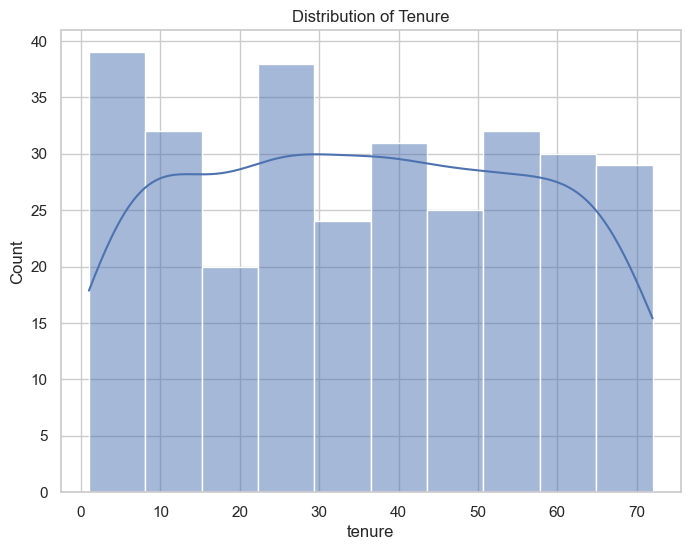

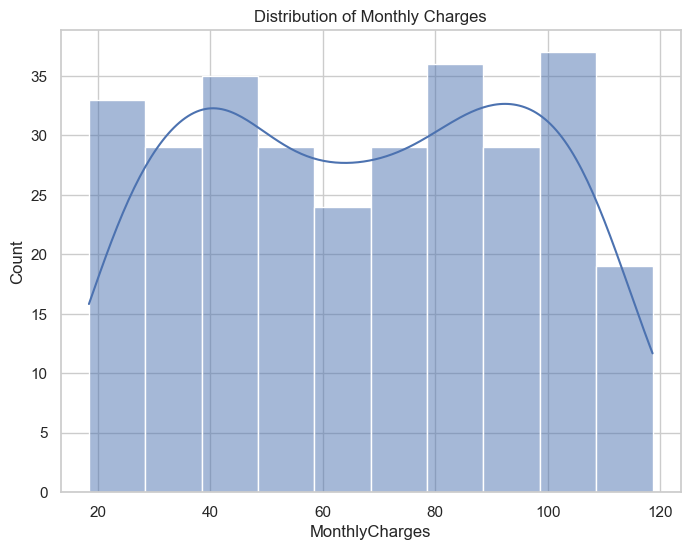

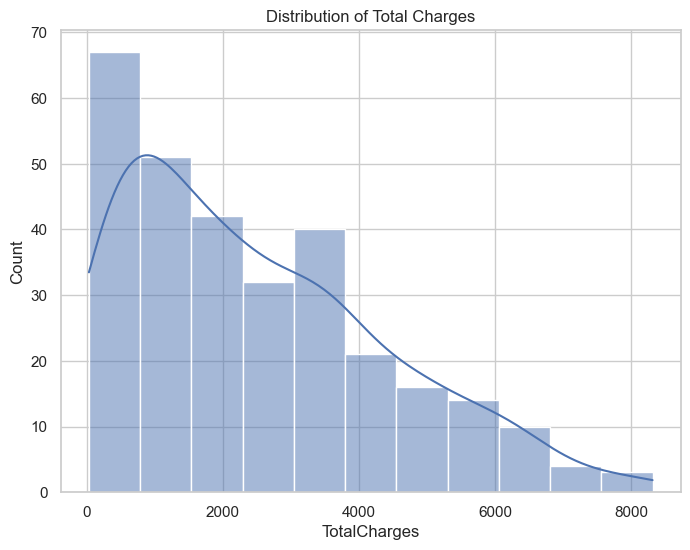

In [51]:
# Plot distributions for numerical features

# Setting up the visual style
sns.set(style="whitegrid")

# Plot distributions for numerical features

# Tenure
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

# Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

# Total Charges
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.show()


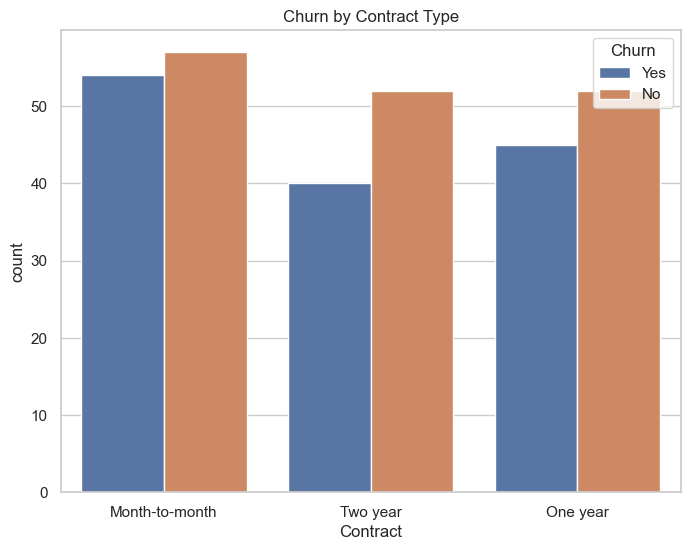

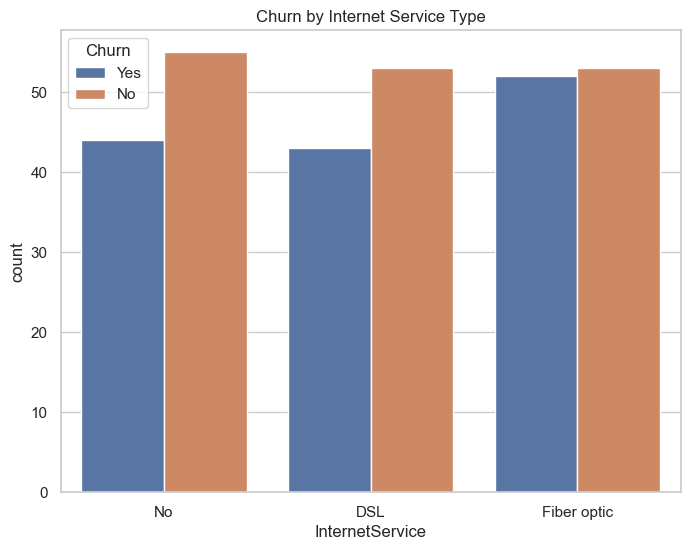

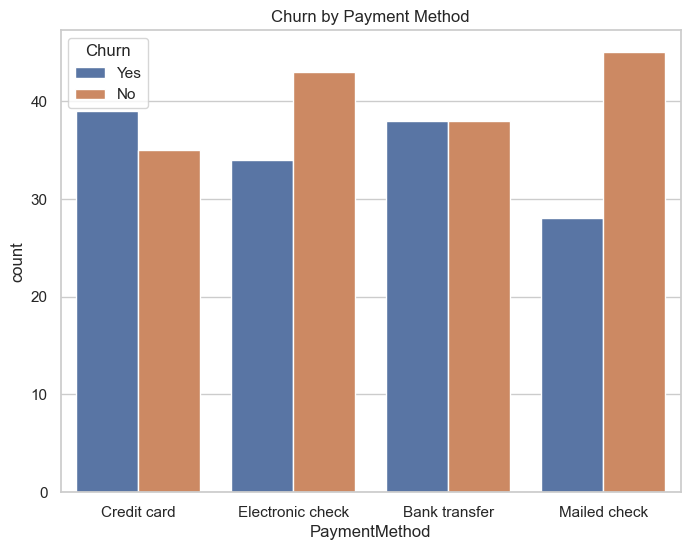

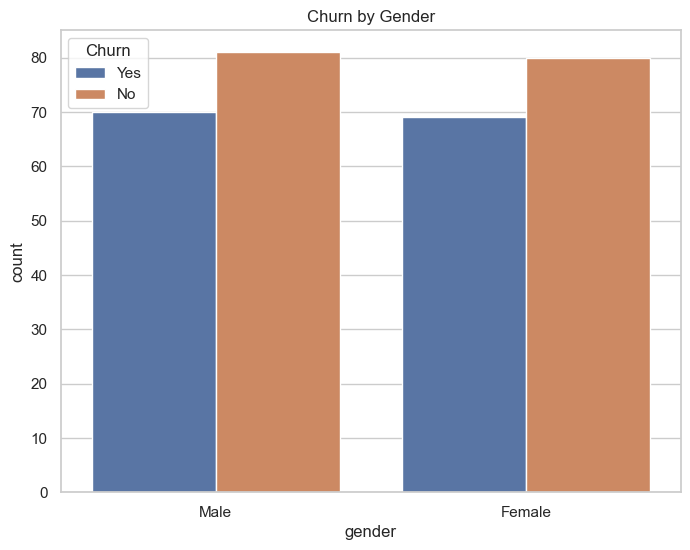

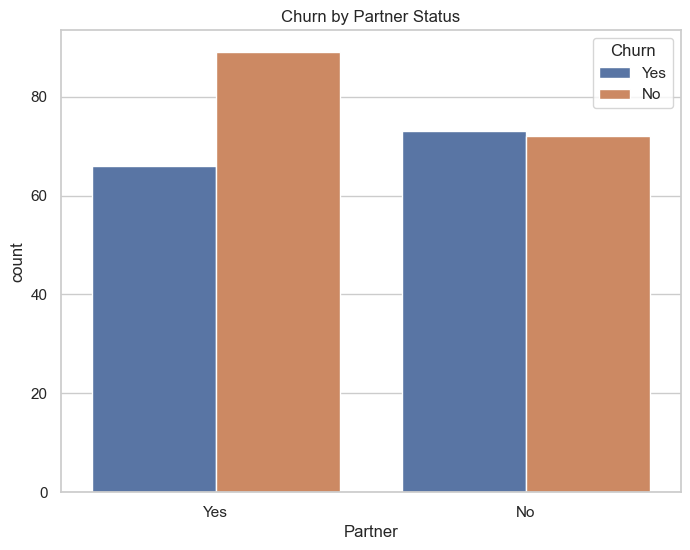

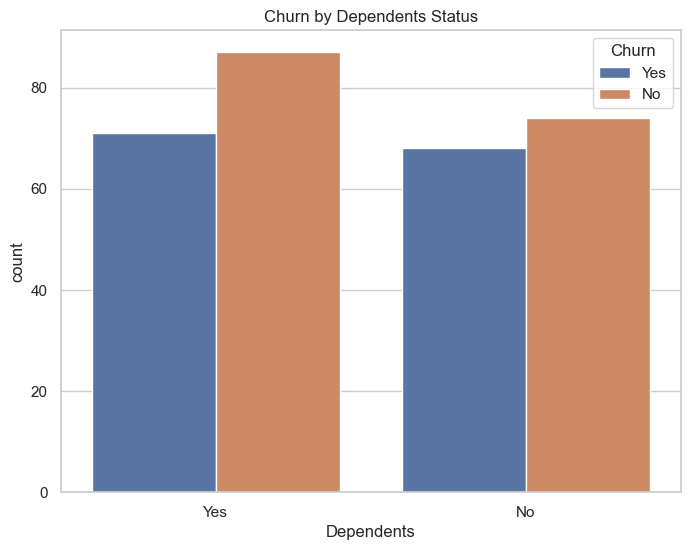

In [52]:
# Plotting the relationship between categorical features and Churn

# Contract
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# Internet Service
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.show()

# Payment Method
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.show()

# Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

# Partner
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Partner', hue='Churn')
plt.title('Churn by Partner Status')
plt.show()

# Dependents
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Dependents', hue='Churn')
plt.title('Churn by Dependents Status')
plt.show()

In [53]:
from scipy.stats import chi2_contingency

# Hypothesis 1: Contract Type and Churn
contingency_contract = pd.crosstab(df_cleaned['Contract'], df_cleaned['Churn'])
chi2_contract, p_contract, dof_contract, expected_contract = chi2_contingency(contingency_contract)

# Hypothesis 2: Internet Service Type and Churn
contingency_internet = pd.crosstab(df_cleaned['InternetService'], df_cleaned['Churn'])
chi2_internet, p_internet, dof_internet, expected_internet = chi2_contingency(contingency_internet)

# Hypothesis 3: Payment Method and Churn
contingency_payment = pd.crosstab(df_cleaned['PaymentMethod'], df_cleaned['Churn'])
chi2_payment, p_payment, dof_payment, expected_payment = chi2_contingency(contingency_payment)

# Display the p-values
print(f"P-value for Contract Type and Churn: {p_contract:.4f}")
print(f"P-value for Internet Service Type and Churn: {p_internet:.4f}")
print(f"P-value for Payment Method and Churn: {p_payment:.4f}")


P-value for Contract Type and Churn: 0.7630
P-value for Internet Service Type and Churn: 0.7176
P-value for Payment Method and Churn: 0.3039


In [54]:
# Significance level
alpha = 0.05

# Interpretation for Contract Type
if p_contract < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Contract Type and Churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Contract Type and Churn.")

# Interpretation for Internet Service Type
if p_internet < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Internet Service Type and Churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Internet Service Type and Churn.")

# Interpretation for Payment Method
if p_payment < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Payment Method and Churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Payment Method and Churn.")


Fail to reject the null hypothesis: There is no significant relationship between Contract Type and Churn.
Fail to reject the null hypothesis: There is no significant relationship between Internet Service Type and Churn.
Fail to reject the null hypothesis: There is no significant relationship between Payment Method and Churn.


In [55]:
import numpy as np

# Randomly assign customers to control and treatment groups
np.random.seed(42)
df_cleaned['Group'] = np.random.choice(['Control', 'Treatment'], size=len(df_cleaned), p=[0.5, 0.5])

# Simulate the retention strategy by assuming the treatment group received a discount
# Let's assume the discount reduces churn by 10% for customers in the treatment group
df_cleaned['Churn_Treated'] = df_cleaned.apply(
    lambda x: 'No' if x['Group'] == 'Treatment' and x['Churn'] == 'Yes' and np.random.rand() < 0.1 else x['Churn'],
    axis=1
)


In [56]:
# Chi-Square test on the new churn data
contingency_ab_test = pd.crosstab(df_cleaned['Group'], df_cleaned['Churn_Treated'])
chi2_ab_test, p_ab_test, dof_ab_test, expected_ab_test = chi2_contingency(contingency_ab_test)

# Display the p-value
print(f"P-value for A/B test: {p_ab_test:.4f}")

# Interpretation
if p_ab_test < alpha:
    print("Reject the null hypothesis: The retention strategy has a significant effect on reducing churn.")
else:
    print("Fail to reject the null hypothesis: The retention strategy does not have a significant effect on reducing churn.")


P-value for A/B test: 0.0007
Reject the null hypothesis: The retention strategy has a significant effect on reducing churn.


In [57]:
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
columns_to_drop = ['customerID', 'Churn', 'Group', 'Churn_Treated', 'tenure_group']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]

X = df_cleaned.drop(columns=existing_columns_to_drop)
y = df_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Yes'/'No' to 1/0 for classification

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (210, 19)
X_test shape: (90, 19)
y_train shape: (210,)
y_test shape: (90,)


In [79]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Logistic Regression Model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=42))])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# Classification Evaluation
print("\nLogistic Regression Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg):.3f}')
print(f'Precision: {precision_score(y_test, y_pred_logreg):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_logreg):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_logreg):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_logreg):.3f}')

# Regression Metrics on Predicted Probabilities
rmse = np.sqrt(mean_squared_error(y_test, y_prob_logreg))
mae = mean_absolute_error(y_test, y_prob_logreg)
r2 = r2_score(y_test, y_prob_logreg)

print("\nRegression Metrics on Predicted Probabilities:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R-squared: {r2:.3f}")




Logistic Regression Metrics:
Accuracy: 0.411
Precision: 0.343
Recall: 0.286
F1-Score: 0.312
ROC-AUC: 0.415

Regression Metrics on Predicted Probabilities:
RMSE: 0.550
MAE: 0.519
R-squared: -0.216



Decision Tree Metrics:
Accuracy: 0.367
Precision: 0.273
Recall: 0.214
F1-Score: 0.240
ROC-AUC: 0.357


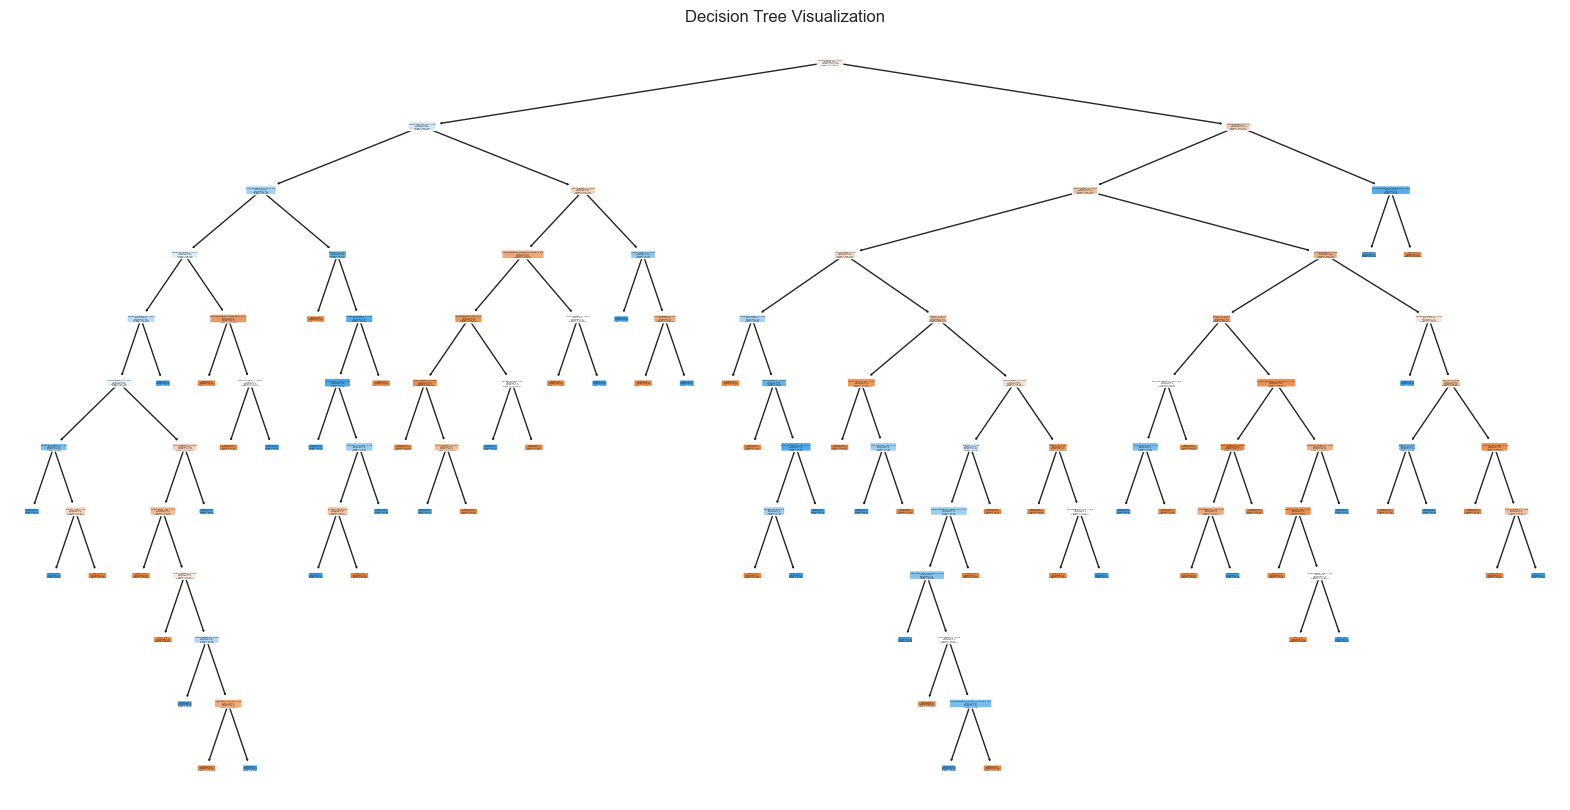

In [59]:

# Decision Tree Model (Classification)
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(random_state=42))])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)
y_prob_tree = tree_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\nDecision Tree Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}')
print(f'Precision: {precision_score(y_test, y_pred_tree):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_tree):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_tree):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_tree):.3f}')

# Extract feature names after preprocessing (one-hot encoding, etc.)
encoded_feature_names = tree_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.hstack([numeric_features, encoded_feature_names])

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_pipeline.named_steps['classifier'], 
          filled=True, 
          feature_names=all_feature_names, 
          class_names=['No Churn', 'Churn'], 
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model (Classification)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}')
print(f'Precision: {precision_score(y_test, y_pred_rf):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.3f}')



Random Forest Metrics:
Accuracy: 0.478
Precision: 0.391
Recall: 0.214
F1-Score: 0.277
ROC-AUC: 0.444


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model (Classification)
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
y_prob_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\nGradient Boosting Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}')
print(f'Precision: {precision_score(y_test, y_pred_gb):.3f}')
print(f'Recall: {recall_score(y_test, y_pred_gb):.3f}')
print(f'F1-Score: {f1_score(y_test, y_pred_gb):.3f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.3f}')



Gradient Boosting Metrics:
Accuracy: 0.444
Precision: 0.357
Recall: 0.238
F1-Score: 0.286
ROC-AUC: 0.335


In [64]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validated score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best cross-validated score for Random Forest: 0.580952380952381


In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Gradient Boosting
param_distributions_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__min_samples_split': [2, 5, 10]
}

# Random Search with Cross-Validation
random_search_gb = RandomizedSearchCV(gb_pipeline, param_distributions_gb, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_gb.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best cross-validated score for Gradient Boosting:", random_search_gb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boosting: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.01}
Best cross-validated score for Gradient Boosting: 0.5333333333333334


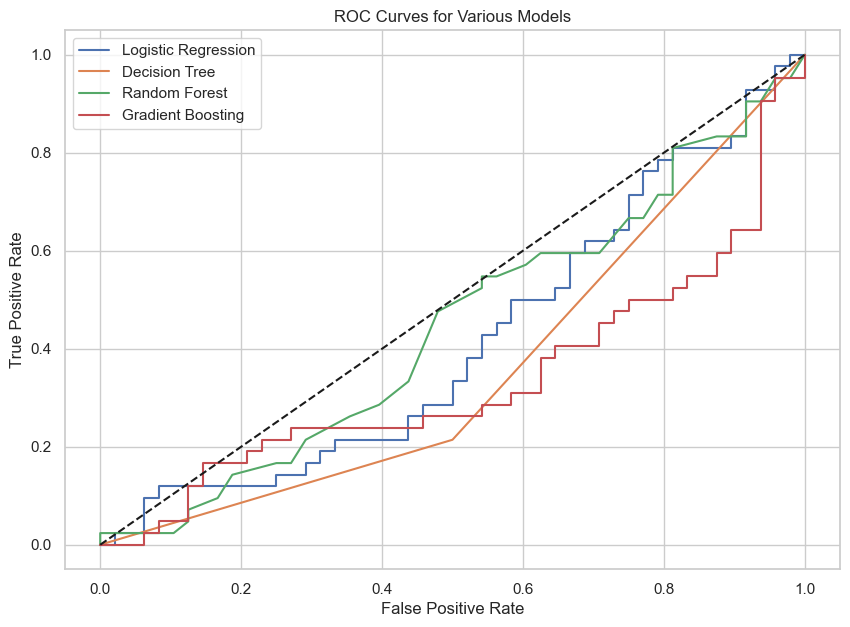

In [66]:
# Plot ROC Curves
plt.figure(figsize=(10, 7))

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--')

# Corrected ylabel
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend()
plt.show()


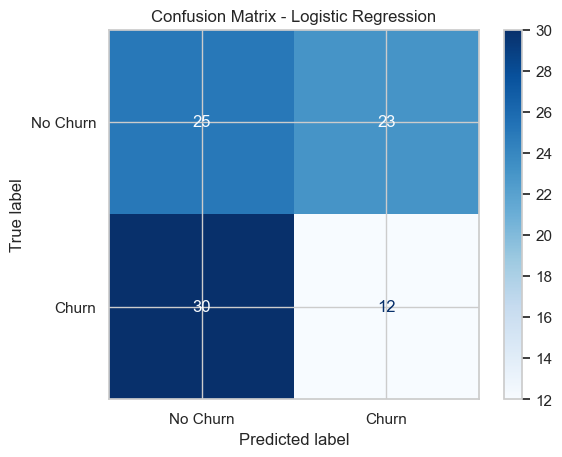

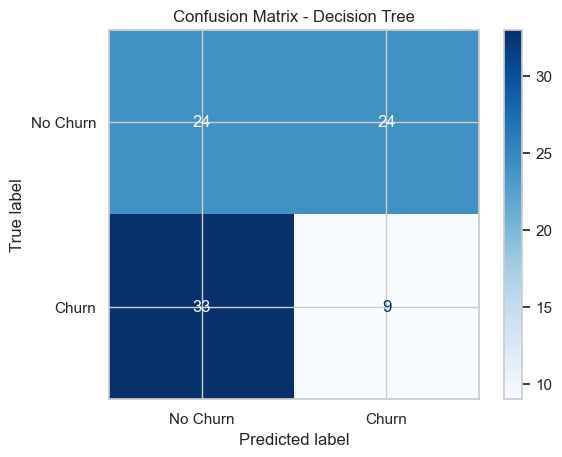

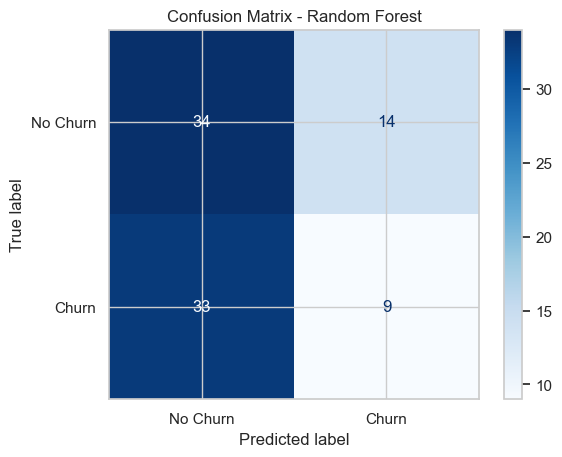

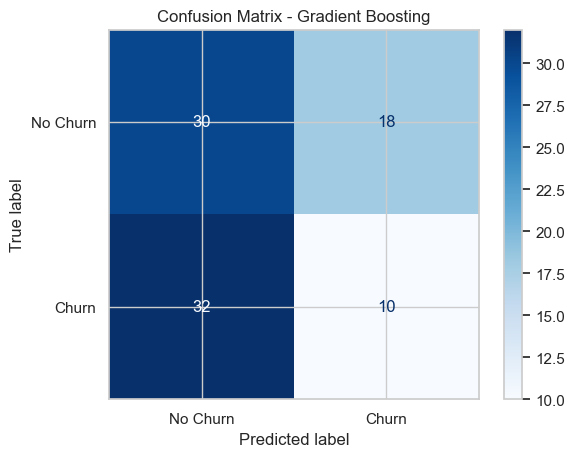

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Models and their predictions
models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

# Plot confusion matrices for each model
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()



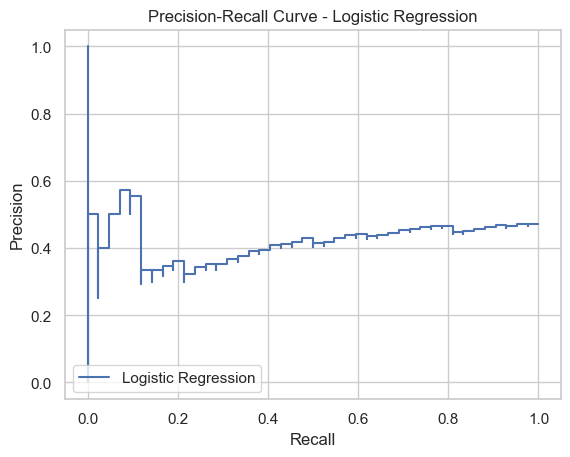

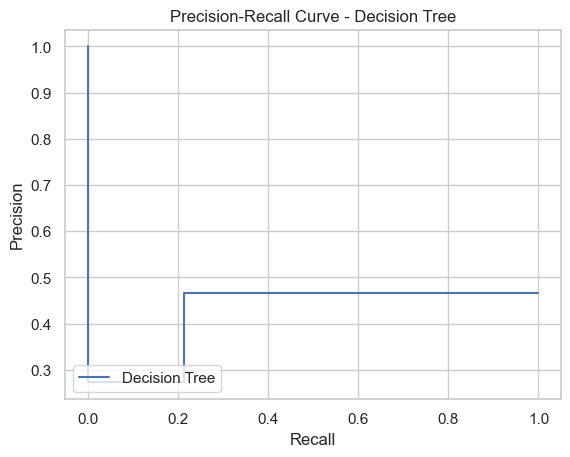

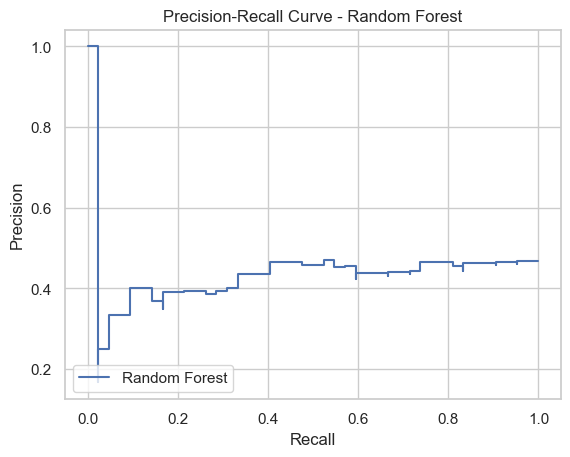

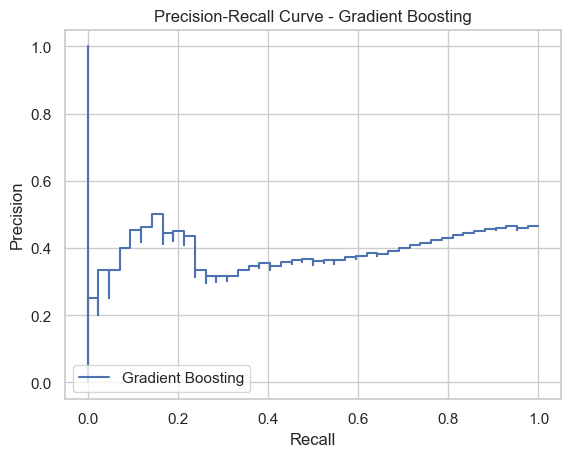

In [72]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Models and their probability predictions
probabilities = {
    "Logistic Regression": y_prob_logreg,
    "Decision Tree": y_prob_tree,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb
}

# Plot Precision-Recall curves for each model
for model_name, y_prob in probabilities.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name=model_name)
    pr_display.plot()
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

